In [1]:
#This notebook is focused on collecting key demographic data for the populations living around the Salton Sea. We will be focusing on population, race/ethnicity, income, employment in 2000, 2010, and 2020. 

In [16]:
import pandas as pd

In [17]:
import geopandas as gpd

In [18]:
df=pd.read_csv('data/census_tracts.csv')

In [19]:
df = pd.read_csv(
    'data/census_tracts.csv',
    dtype=
    {
        'Surrounding Census Tracts':str
    }
    )

In [20]:
df.head()

,Surrounding Census Tracts
0,6025012301
1,6025010200
2,6025010300
3,6025010400
4,6025010500


In [21]:
df2=pd.read_csv('data/R13289617_SL140 3.csv')

In [22]:
df2.head()

,FIPS,"Household_Income:<10,000","Household_ Income:10,000-14,999","Household_Income:15,000-19,999","Household _Income:20,000-24,999","Household_Income:25,000 -29,999","Household_Income:30,000-34,999","Household_Income:35,000-39,999","Household_Income:40,000-44,999","Household_Income:45,000-49,999",...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,6025010200,139,97,84,57,61,43,59,27,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6025010300,12,6,23,61,41,32,32,12,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6025010400,340,236,228,185,115,164,80,68,79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6025010500,276,103,92,111,93,37,76,68,72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6025010600,230,132,137,127,84,85,139,93,135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FIPS                              21 non-null     int64  
 1   Household_Income:<10,000          21 non-null     int64  
 2   Household_ Income:10,000-14,999   21 non-null     int64  
 3   Household_Income:15,000-19,999    21 non-null     int64  
 4   Household _Income:20,000-24,999   21 non-null     int64  
 5   Household_Income:25,000 -29,999   21 non-null     int64  
 6   Household_Income:30,000-34,999    21 non-null     int64  
 7   Household_Income:35,000-39,999    21 non-null     int64  
 8   Household_Income:40,000-44,999    21 non-null     int64  
 9   Household_Income:45,000-49,999    21 non-null     int64  
 10  Household_Income:50,000-59,999    21 non-null     int64  
 11  Household_Income:60,000-74,999    21 non-null     int64  
 12  Household_

In [24]:
df2.FIPS.head()

0    6025010200
1    6025010300
2    6025010400
3    6025010500
4    6025010600
Name: FIPS, dtype: int64

In [25]:
df2.columns[df2.isna().all()].tolist()

['Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45',
 'Unnamed: 46',
 'Unnamed: 47',
 'Unnamed: 48',
 'Unnamed: 49',
 'Unnamed: 50',
 'Unnamed: 51',
 'Unnamed: 52',
 'Unnamed: 53',
 'Unnamed: 54',
 'Unnamed: 55',
 'Unnamed: 56']

In [40]:
df2 = pd.read_csv(
    'data/R13289617_SL140 3.csv',
    dtype=
    {
        'FIPS':str,
     }
)

In [41]:
df2['FIPS']=df2['FIPS'].str.zfill(11)

In [43]:
df2.head()

,FIPS,"Household_Income:<10,000","Household_ Income:10,000-14,999","Household_Income:15,000-19,999","Household _Income:20,000-24,999","Household_Income:25,000 -29,999","Household_Income:30,000-34,999","Household_Income:35,000-39,999","Household_Income:40,000-44,999","Household_Income:45,000-49,999","Household_Income:50,000-59,999","Household_Income:60,000-74,999","Household_Income:75,000-99,999","Household_Income:100,000-124,999","Household_Income:125,000-149,999","Household_Income:150,000-199,999","Household_Income:>=200,000",Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,06025010200,139,97,84,57,61,43,59,27,42,57,43,42,23,4,2,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06025010300,12,6,23,61,41,32,32,12,18,14,14,41,20,0,0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06025010400,340,236,228,185,115,164,80,68,79,127,79,6,21,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06025010500,276,103,92,111,93,37,76,68,72,213,139,189,91,23,17,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06025010600,230,132,137,127,84,85,139,93,135,148,182,275,137,37,24,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [45]:
df2.sample()

,FIPS,"Household_Income:<10,000","Household_ Income:10,000-14,999","Household_Income:15,000-19,999","Household _Income:20,000-24,999","Household_Income:25,000 -29,999","Household_Income:30,000-34,999","Household_Income:35,000-39,999","Household_Income:40,000-44,999","Household_Income:45,000-49,999","Household_Income:50,000-59,999","Household_Income:60,000-74,999","Household_Income:75,000-99,999","Household_Income:100,000-124,999","Household_Income:125,000-149,999","Household_Income:150,000-199,999","Household_Income:>=200,000",Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
3,06025010500,276,103,92,111,93,37,76,68,72,213,139,189,91,23,17,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#this removes spaces from the header labels which will hopefully allow me to select the columns to keep
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [50]:
columns_to_keep = ['FIPS',
                   'Household_Income:<10,000',
                   'Household_ Income:10,000-14,999',
                   'Household_Income:15,000-19,999',
                   'Household _Income:20,000-24,999',
                   'Household_Income:25,000 -29,999',
                   'Household_Income:30,000-34,999',
                   'Household_Income:35,000-39,999',
                   'Household_Income:40,000-44,999',
                   'Household_Income:45,000-49,999',
                   'Household_Income:50,000-59,999',
                   'Household_Income:60,000-74,999',
                   'Household_Income:75,000-99,999',
                   'Household_Income:100,000-124,999',
                   'Household_Income:125,000-149,999',
                   'Household_Income:150,000-199,999',
                   'Household_Income:>=200,000'
                  ]
# add it to a new dataframe
df3 = df2[columns_to_keep]

In [51]:
df3.sample()

,FIPS,"Household_Income:<10,000","Household_ Income:10,000-14,999","Household_Income:15,000-19,999","Household _Income:20,000-24,999","Household_Income:25,000 -29,999","Household_Income:30,000-34,999","Household_Income:35,000-39,999","Household_Income:40,000-44,999","Household_Income:45,000-49,999","Household_Income:50,000-59,999","Household_Income:60,000-74,999","Household_Income:75,000-99,999","Household_Income:100,000-124,999","Household_Income:125,000-149,999","Household_Income:150,000-199,999","Household_Income:>=200,000"
13,06025011400,240,196,100,115,105,39,84,23,67,54,30,8,17,8,9,0


In [52]:
df3['Household_Income:<10,000'].head()

0    139
1     12
2    340
3    276
4    230
Name: Household_Income:<10,000, dtype: int64

In [54]:
# get some stats
df3['Household_Income:<10,000'].describe()

count     21.000000
mean     171.952381
std       91.763542
min       12.000000
25%      112.000000
50%      177.000000
75%      230.000000
max      340.000000
Name: Household_Income:<10,000, dtype: float64

<AxesSubplot: ylabel='Frequency'>

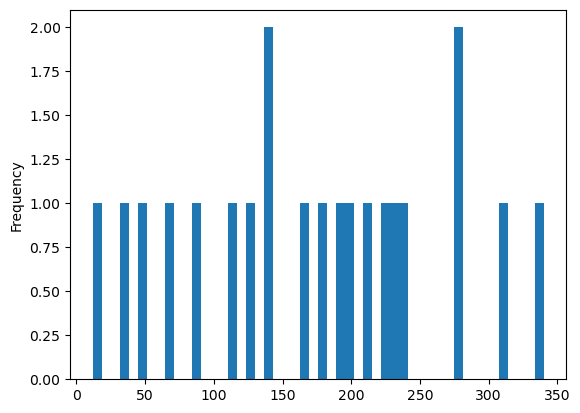

In [53]:
df3['Household_Income:<10,000'].plot.hist(bins=50)

<AxesSubplot: >

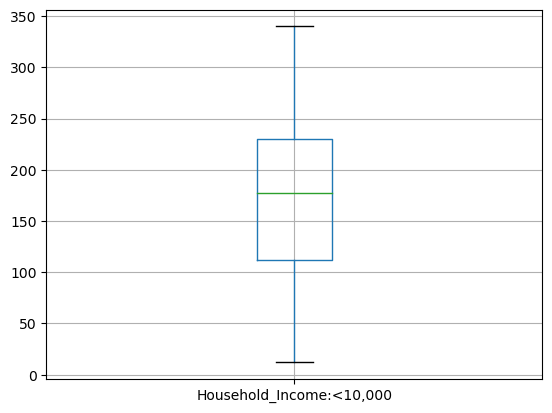

In [55]:
df3.boxplot(column=['Household_Income:<10,000'])

<AxesSubplot: xlabel='Household_Income:<10,000', ylabel='Household_Income:>=200,000'>

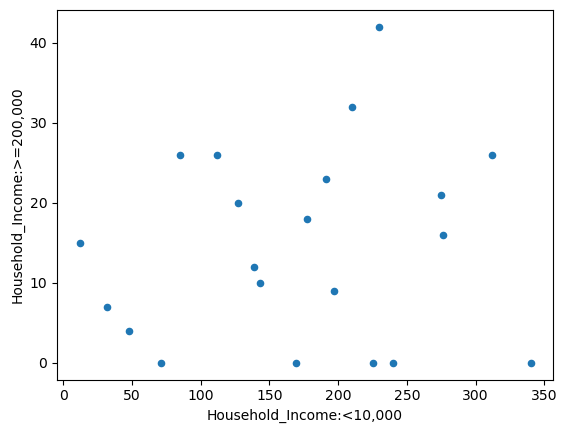

In [56]:
df3.plot.scatter(x='Household_Income:<10,000',y='Household_Income:>=200,000')

In [58]:
df3_sorted = df3.sort_values(by='Household_Income:>=200,000',ascending = False)

<AxesSubplot: ylabel='Frequency'>

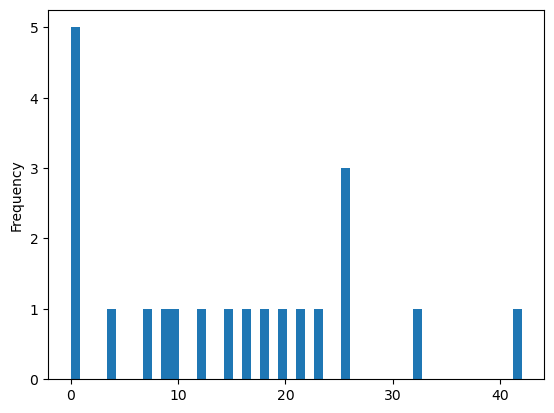

In [59]:
df3_sorted['Household_Income:>=200,000'].plot.hist(bins=50)

<AxesSubplot: xlabel='FIPS'>

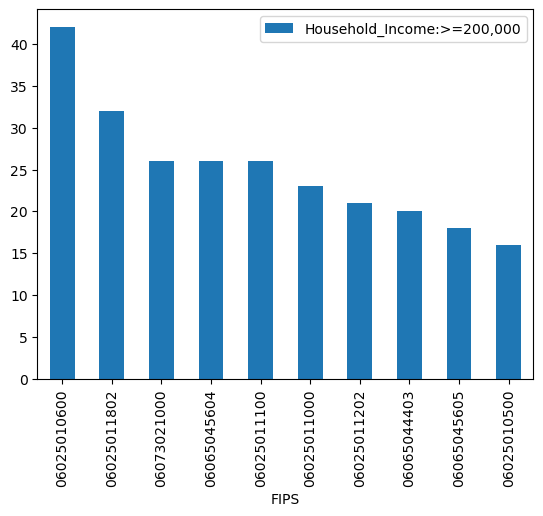

In [60]:
df3_sorted.head(10).plot.bar(x='FIPS',
                            y='Household_Income:>=200,000')

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Numbers of Households with Incomes >= 200,000'}, ylabel='FIPS'>

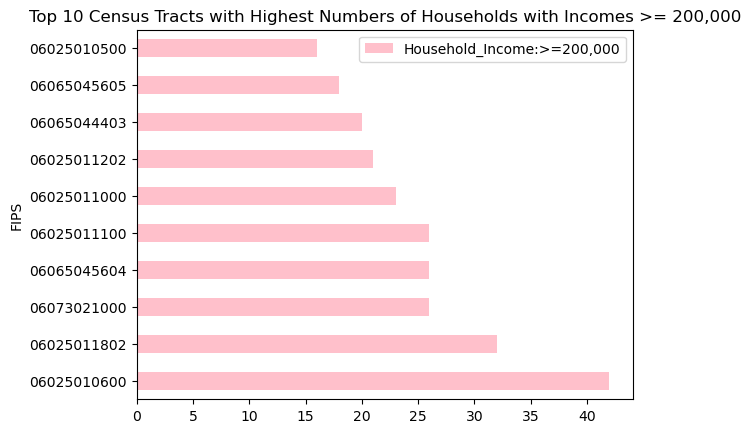

In [63]:
df3_sorted.head(10).plot.barh(x='FIPS',
                            y='Household_Income:>=200,000', 
                            title='Top 10 Census Tracts with Highest Numbers of Households with Incomes >= 200,000',
                            color='pink')

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Numbers of Households with Incomes <10,000'}, ylabel='FIPS'>

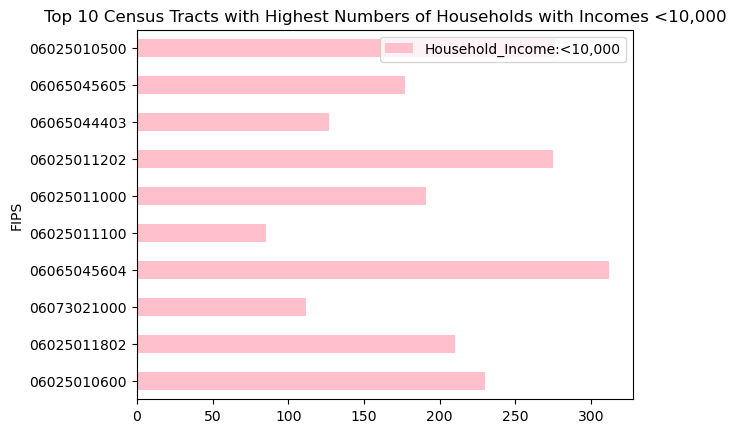

In [64]:
df3_sorted.head(10).plot.barh(x='FIPS',
                            y='Household_Income:<10,000', 
                            title='Top 10 Census Tracts with Highest Numbers of Households with Incomes <10,000',
                            color='pink')

In [65]:
import geopandas as gpd

In [69]:
tracts=gpd.read_file('data/geojson_data/tl_rd22_06_tract.shp')
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,029,004402,06029004402,44.02,Census Tract 44.02,G5020,S,1865739,0,+35.5917343,-119.3337642,"POLYGON ((-119.33828 35.58143, -119.33827 35.5..."
1,06,047,000802,06047000802,8.02,Census Tract 8.02,G5020,S,2321653,0,+37.3433591,-120.5854604,"POLYGON ((-120.59599 37.34121, -120.59596 37.3..."
2,06,085,501402,06085501402,5014.02,Census Tract 5014.02,G5020,S,522620,0,+37.3453341,-121.8665169,"POLYGON ((-121.87381 37.34412, -121.87361 37.3..."
3,06,005,000102,06005000102,1.02,Census Tract 1.02,G5020,S,456204155,7940832,+38.5496993,-120.2509786,"POLYGON ((-120.61016 38.41560, -120.61000 38.4..."
4,06,029,004901,06029004901,49.01,Census Tract 49.01,G5020,S,1459379,0,+35.7837173,-119.2462266,"POLYGON ((-119.25262 35.79043, -119.25259 35.7..."


<AxesSubplot: >

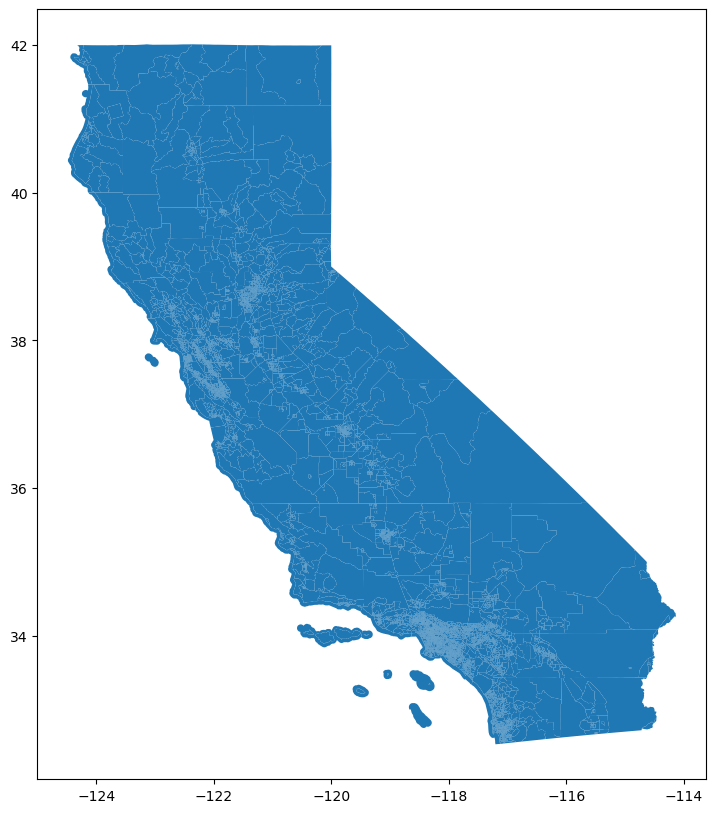

In [70]:
# plot it!
tracts.plot(figsize=(12,10))

In [71]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9129 entries, 0 to 9128
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   9129 non-null   object  
 1   COUNTYFP  9129 non-null   object  
 2   TRACTCE   9129 non-null   object  
 3   GEOID     9129 non-null   object  
 4   NAME      9129 non-null   object  
 5   NAMELSAD  9129 non-null   object  
 6   MTFCC     9129 non-null   object  
 7   FUNCSTAT  9129 non-null   object  
 8   ALAND     9129 non-null   int64   
 9   AWATER    9129 non-null   int64   
 10  INTPTLAT  9129 non-null   object  
 11  INTPTLON  9129 non-null   object  
 12  geometry  9129 non-null   geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 927.3+ KB


In [72]:
tracts = tracts[['GEOID','geometry']]
tracts.head()

,GEOID,geometry
0,06029004402,"POLYGON ((-119.33828 35.58143, -119.33827 35.5..."
1,06047000802,"POLYGON ((-120.59599 37.34121, -120.59596 37.3..."
2,06085501402,"POLYGON ((-121.87381 37.34412, -121.87361 37.3..."
3,06005000102,"POLYGON ((-120.61016 38.41560, -120.61000 38.4..."
4,06029004901,"POLYGON ((-119.25262 35.79043, -119.25259 35.7..."


In [76]:
# create a FIPS column
tracts['FIPS'] = tracts['GEOID']

In [77]:
tracts.head()

,GEOID,geometry,FIPS
0,06029004402,"POLYGON ((-119.33828 35.58143, -119.33827 35.5...",06029004402
1,06047000802,"POLYGON ((-120.59599 37.34121, -120.59596 37.3...",06047000802
2,06085501402,"POLYGON ((-121.87381 37.34412, -121.87361 37.3...",06085501402
3,06005000102,"POLYGON ((-120.61016 38.41560, -120.61000 38.4...",06005000102
4,06029004901,"POLYGON ((-119.25262 35.79043, -119.25259 35.7...",06029004901


In [78]:
tracts_income=tracts.merge(df3,on="FIPS")

In [79]:
tracts_income.head()

,GEOID,geometry,FIPS,"Household_Income:<10,000","Household_ Income:10,000-14,999","Household_Income:15,000-19,999","Household _Income:20,000-24,999","Household_Income:25,000 -29,999","Household_Income:30,000-34,999","Household_Income:35,000-39,999","Household_Income:40,000-44,999","Household_Income:45,000-49,999","Household_Income:50,000-59,999","Household_Income:60,000-74,999","Household_Income:75,000-99,999","Household_Income:100,000-124,999","Household_Income:125,000-149,999","Household_Income:150,000-199,999","Household_Income:>=200,000"
0,06025010600,"POLYGON ((-115.58198 32.94896, -115.58186 32.9...",06025010600,230,132,137,127,84,85,139,93,135,148,182,275,137,37,24,42
1,06025011201,"POLYGON ((-115.59499 32.79316, -115.59498 32.7...",06025011201,48,28,67,39,22,30,56,29,73,103,159,194,72,31,20,4
2,06065044403,"POLYGON ((-116.86338 33.44219, -116.86328 33.4...",06065044403,127,131,129,136,135,52,57,45,49,149,110,36,39,14,0,20
3,06025011202,"POLYGON ((-115.57870 32.79626, -115.57870 32.7...",06025011202,275,171,127,164,136,110,68,123,88,130,124,40,9,21,0,21
4,06025010500,"POLYGON ((-115.55814 32.97901, -115.55797 32.9...",06025010500,276,103,92,111,93,37,76,68,72,213,139,189,91,23,17,16


<AxesSubplot: >

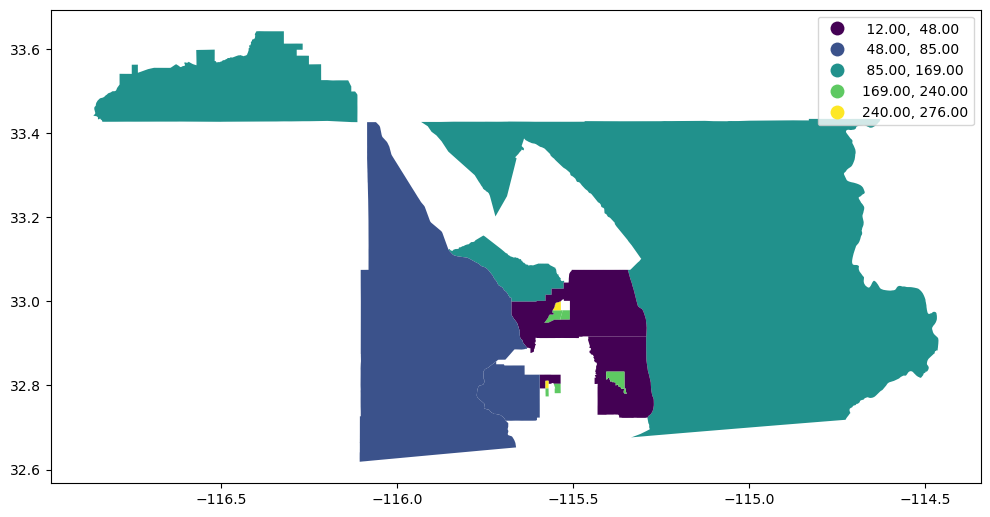

In [80]:
tracts_income.plot(figsize=(12,10),
                 column='Household_Income:<10,000',
                 legend=True, 
                 scheme='NaturalBreaks')

In [81]:
import folium

In [82]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

<AxesSubplot: >

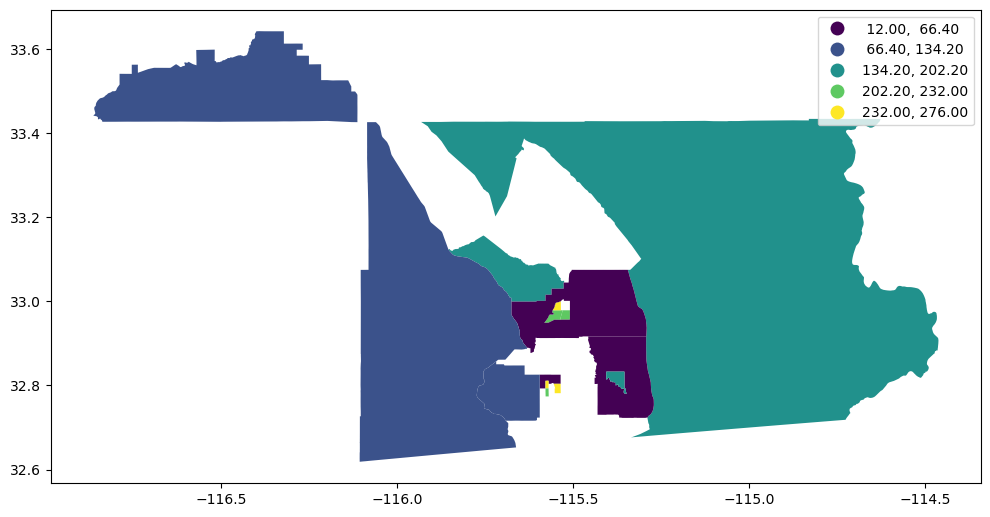

In [84]:
tracts_income.plot(figsize=(12,10),
                 column='Household_Income:<10,000',
                 legend=True, 
                 scheme='quantiles')

In [85]:
folium.Choropleth(
                  geo_data=tracts_income, # geo data
                  data=tracts_income, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'Household_Income:>=200,000'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='# of household with income > or = $200,000').add_to(m)    # name on the legend color bar
m

In [87]:
folium.Choropleth(
                  geo_data=tracts_income, # geo data
                  data=tracts_income, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'Household_ Income:10,000-14,999'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='# of household with income > or = $200,000').add_to(m)    # name on the legend color bar
m

In [89]:
folium.Choropleth(
                  geo_data=tracts_income, # geo data
                  data=tracts_income, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'Household _Income:20,000-24,999'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='# of household with income > or = $200,000').add_to(m)    # name on the legend color bar
m